<a href="https://colab.research.google.com/github/fitrimutmainah/Klasifikasi/blob/main/Klastering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv('/content/Reviews.csv')

# Lihat beberapa kolom yang tersedia
print(df.columns)

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


Processing Data

In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = str(text).lower()                            # Lowercasing
    text = re.sub(r'[^a-z\s]', '', text)                # Remove non-alphabetic
    tokens = text.split()                               # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Stopword removal
    return " ".join(tokens)

df = df.dropna(subset=['Text'])  # Pastikan tidak ada nilai null
df['cleaned'] = df['Text'].apply(preprocess)

# Ambil sebagian data untuk efisiensi
sampled_df = df.sample(n=3000, random_state=42)  # Ambil 3000 data


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#TF IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(sampled_df['cleaned'])

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)

sampled_df['cluster'] = clusters

Evaluasi silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_tfidf, clusters)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.012847506400341144


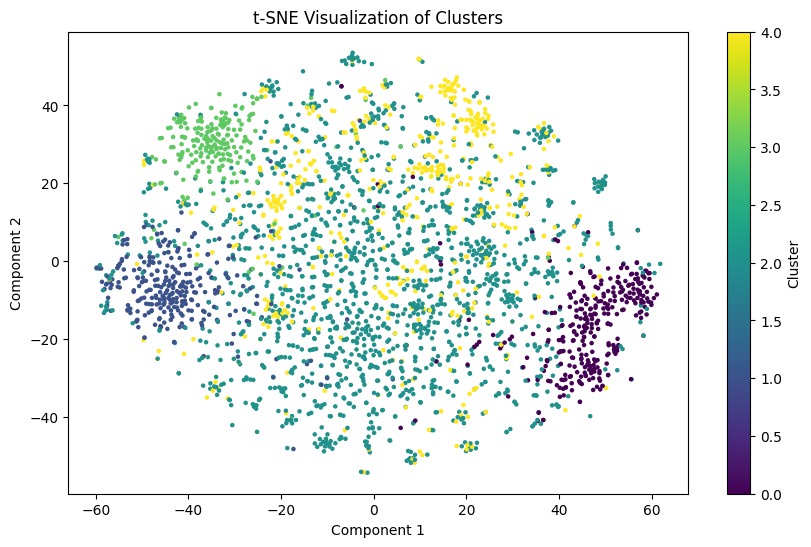

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10,6))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=clusters, cmap='viridis', s=5)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')
plt.show()
